In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("Results - Sheet1.csv")
df.columns

Index(['Model', 'comments', 'dataset', 'dataset type', 'Precision Performance',
       'Recall Performance', 'F1 performance'],
      dtype='object')

In [3]:
df[["Model", "comments", "dataset", "dataset type"]] = df[
    ["Model", "comments", "dataset", "dataset type"]
].fillna(" ")
df[["Precision Performance", "Recall Performance", "F1 performance"]] = df[
    ["Precision Performance", "Recall Performance", "F1 performance"]
].fillna(0)

In [4]:
model = "PBM"
comments = "DP"

for attack in ["paraphrased", "textfooler", "textbugger"]:
    print("Attack: ", attack)
    for dataset in ["imdb", "ag_news", "dbpedia"]:
        sub_df = df[
            (df["Model"] == model)
            & (df["comments"] == comments)
            & (df["dataset"] == dataset)
            & (df["dataset type"].str.endswith(attack))
        ]
        if len(sub_df) != 2:
            raise ValueError("Not 2 rows")
        adv = sub_df[sub_df["dataset type"] == f"adv - {attack}"]
        test = sub_df[sub_df["dataset type"] == f"test - {attack}"]
        print(
            "%.3f" % adv["Precision Performance"].values[0],
            "(",
            "%.3f"
            % (
                adv["Precision Performance"].values[0]
                - test["Precision Performance"].values[0]
            ),
            ")&",
            "%.3f" % adv["Recall Performance"].values[0],
            "(",
            "%.3f"
            % (
                adv["Recall Performance"].values[0]
                - test["Recall Performance"].values[0]
            ),
            ")&",
            "%.3f" % adv["F1 performance"].values[0],
            "(",
            "%.3f"
            % (adv["F1 performance"].values[0] - test["F1 performance"].values[0]),
            ")&",
        )
    print("------------------")

Attack:  paraphrased
0.000 ( 0.000 )& 0.000 ( 0.000 )& 0.000 ( 0.000 )&
0.000 ( 0.000 )& 0.000 ( 0.000 )& 0.000 ( 0.000 )&
0.000 ( 0.000 )& 0.000 ( 0.000 )& 0.000 ( 0.000 )&
------------------
Attack:  textfooler
0.690 ( -0.194 )& 0.687 ( -0.193 )& 0.685 ( -0.195 )&
0.514 ( -0.287 )& 0.504 ( -0.293 )& 0.502 ( -0.294 )&
0.547 ( -0.364 )& 0.548 ( -0.380 )& 0.538 ( -0.381 )&
------------------
Attack:  textbugger
0.718 ( -0.136 )& 0.716 ( -0.134 )& 0.716 ( -0.133 )&
0.523 ( -0.161 )& 0.501 ( -0.173 )& 0.500 ( -0.173 )&
0.579 ( -0.298 )& 0.552 ( -0.335 )& 0.552 ( -0.329 )&
------------------


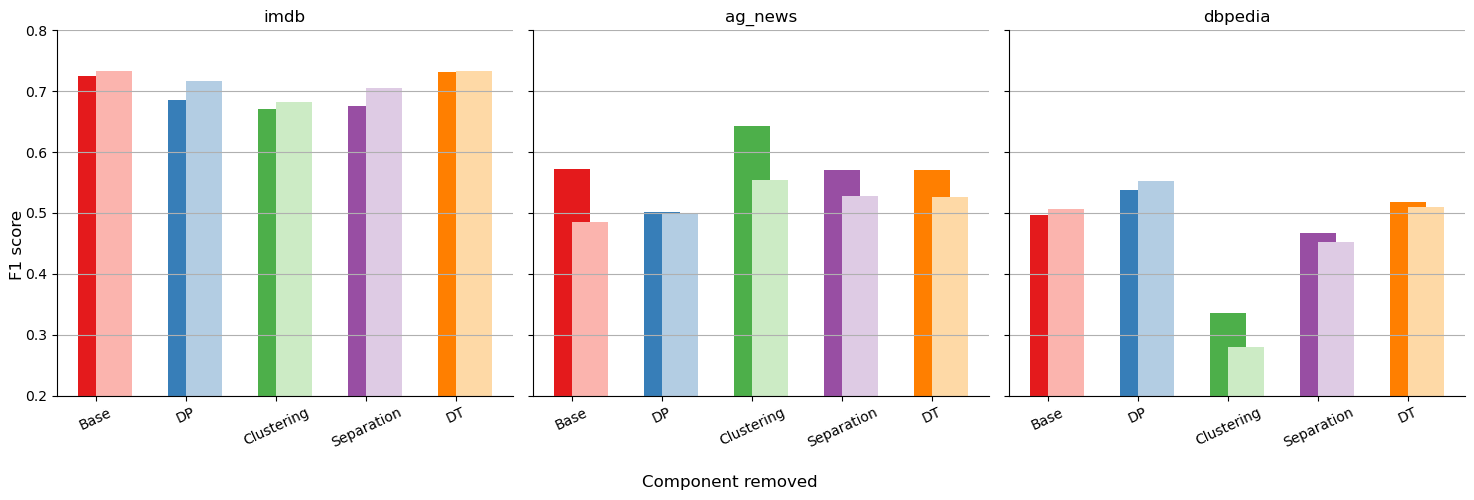

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for index, dataset in enumerate(["imdb", "ag_news", "dbpedia"]):
    x = df[
        (df["Model"] == "PBM")
        & (df["comments"].isin(["DP", "Clustering", " ", "Separation", "DT"]))
        & (df["dataset"] == dataset)
        & (~df["dataset type"].str.contains("paraphrased"))
    ]
    x_test_textfooler = x[(x["dataset type"] == f"test - textfooler")]
    x_adv_textfooler = x[x["dataset type"] == f"adv - textfooler"]
    x_test_textbugger = x[(x["dataset type"] == f"test - textbugger")]
    x_adv_textbugger = x[x["dataset type"] == f"adv - textbugger"]
    # like red and pale red, and then blue and pale blue
    ten_colors_each_two_being_similar = [
        "#e41a1c",
        "#fbb4ae",
        "#377eb8",
        "#b3cde3",
        "#4daf4a",
        "#ccebc5",
        "#984ea3",
        "#decbe4",
        "#ff7f00",
        "#fed9a6",
    ]
    keys = [" ", "DP", "Clustering", "Separation", "DT"]
    values_textfooler = []
    values_textbugger = []
    for key in keys:
        values_textfooler.append(
            x_adv_textfooler[x_adv_textfooler["comments"] == key][
                "F1 performance"
            ].values[0]
        )
        values_textbugger.append(
            x_adv_textbugger[x_adv_textbugger["comments"] == key][
                "F1 performance"
            ].values[0]
        )

    axs[index].bar(
        list(range(len(keys))),
        values_textfooler,
        color=ten_colors_each_two_being_similar[::2],
        width=0.4,
    )
    # have x + 0.2 to separate the bars
    axs[index].bar(
        [x + 0.2 for x in list(range(len(keys)))],
        values_textbugger,
        color=ten_colors_each_two_being_similar[1::2],
        width=0.4,
    )
    # draw the xtick labels in the next line
    axs[index].set_xticks(list(range(len(keys))))
    axs[index].set_title(dataset)
    # axs[index].set(xlabel="Component removed", ylabel="F1 score change")
    axs[index].set_ylim([0.2, 0.8])
    # remove the upper and right spines
    axs[index].spines["right"].set_visible(False)
    axs[index].spines["top"].set_visible(False)
    axs[index].grid(axis="y")
    axs[index].set_xticklabels(
        [f"{x if x != ' ' else 'Base'}" for x in keys], rotation=25
    )
fig.supxlabel("Component removed")
fig.supylabel("F1 score")
plt.tight_layout()

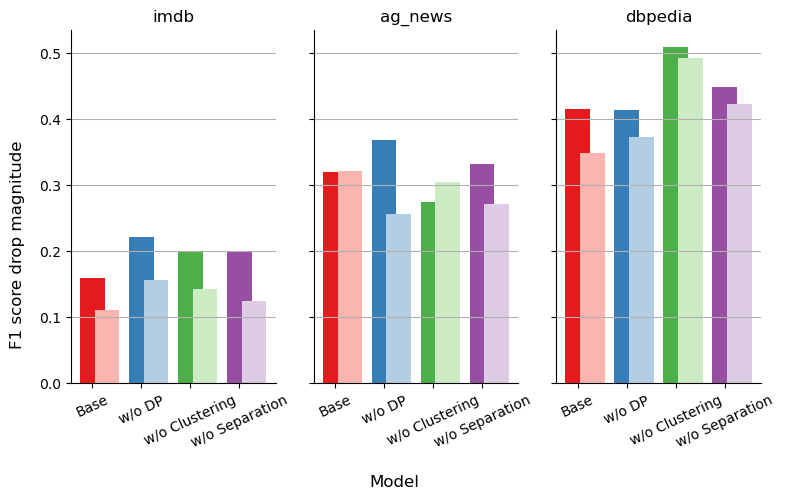

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(8, 5), sharey=True)
for index, dataset in enumerate(["imdb", "ag_news", "dbpedia"]):
    x = df[
        (df["Model"] == "PBM")
        & (df["comments"].isin(["DP", "Clustering", " ", "Separation"]))
        & (df["dataset"] == dataset)
        & (~df["dataset type"].str.contains("paraphrased"))
    ]
    x_test_textfooler = x[(x["dataset type"] == f"test - textfooler")]
    x_adv_textfooler = x[x["dataset type"] == f"adv - textfooler"]
    x_test_textbugger = x[(x["dataset type"] == f"test - textbugger")]
    x_adv_textbugger = x[x["dataset type"] == f"adv - textbugger"]
    # like red and pale red, and then blue and pale blue
    ten_colors_each_two_being_similar = [
        "#e41a1c",
        "#fbb4ae",
        "#377eb8",
        "#b3cde3",
        "#4daf4a",
        "#ccebc5",
        "#984ea3",
        "#decbe4",
        # "#ff7f00",
        # "#fed9a6",
    ]
    keys = [" ", "DP", "Clustering", "Separation"]
    values_textfooler = []
    values_textbugger = []
    for key in keys:
        values_textfooler.append(
            -(
                x_adv_textfooler[x_adv_textfooler["comments"] == key][
                    "F1 performance"
                ].values[0]
                - x_test_textfooler[x_test_textfooler["comments"] == key][
                    "F1 performance"
                ].values[0]
            )
            / x_test_textfooler[x_test_textfooler["comments"] == key][
                "F1 performance"
            ].values[0]
        )
        values_textbugger.append(
            -(
                x_adv_textbugger[x_adv_textbugger["comments"] == key][
                    "F1 performance"
                ].values[0]
                - x_test_textbugger[x_test_textbugger["comments"] == key][
                    "F1 performance"
                ].values[0]
            )
            / x_test_textbugger[x_test_textbugger["comments"] == key][
                "F1 performance"
            ].values[0]
        )

    axs[index].bar(
        list(range(len(keys))),
        values_textfooler,
        color=ten_colors_each_two_being_similar[::2],
        width=0.5,
    )
    # have x + 0.2 to separate the bars
    axs[index].bar(
        [x + 0.3 for x in list(range(len(keys)))],
        values_textbugger,
        color=ten_colors_each_two_being_similar[1::2],
        width=0.5,
    )
    # draw the xtick labels in the next line
    axs[index].set_xticks(list(range(len(keys))))
    axs[index].set_title(dataset)
    # axs[index].set(xlabel="Component removed", ylabel="F1 score change")
    # axs[index].set_ylim([0.2, 0.8])
    # remove the upper and right spines
    axs[index].spines["right"].set_visible(False)
    axs[index].spines["top"].set_visible(False)
    axs[index].grid(axis="y")
    axs[index].set_xticklabels(
        [
            {
                " ": "Base",
                "Clustering": "w/o Clustering",
                "DP": "w/o DP",
                "Separation": "w/o Separation",
            }[x]
            for x in keys
        ],
        rotation=25,
    )
fig.supxlabel("Model")
fig.supylabel("F1 score drop magnitude")
plt.tight_layout()